# 1. 로지스틱 회귀분석(Logistic Regression)

### 개념
1. 선형회귀의 개념을 종속변수 Y가 범주형인 경우로 확장
2. 독립변수의 결합을 이용하여 사건의 발생 가능성을 예측하는 통계 기법
3. 레코드를 클래스 중 하나로 분류하는 모델

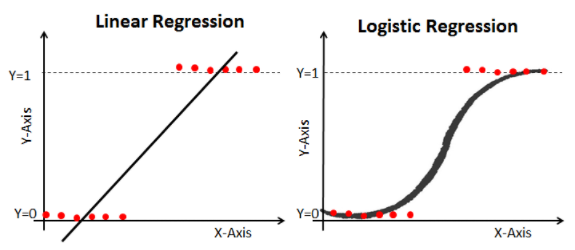

### 종류
1. 단순 로지스틱 회귀분석: 한 개의 독립변수로 타겟변수의 클래스를 분류
2. 다중 로지스틱 회귀분석: 타겟변수의 클래스를 분류하기 위해 여러 개의 독립변수를 함께 사용
3. 이항 로지스틱 회귀분석: 타겟변수의 범주가 2개인 경우
4. 다항 로지스틱 회귀분석: 타겟변수의 범주가 3개 이상인 경우

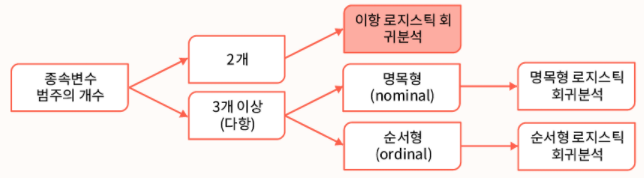

### 모형의 원리
* 종속변수 Y를 대신해서 '로짓(Logit)'이라는 Y의 함수를 사용하는 것

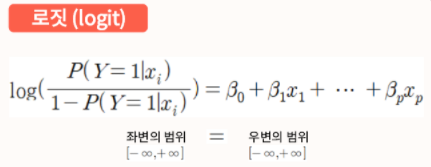

위 그림 속 식의 log 안의 값을 오즈(odds)라고 함

# 2. 오즈 (Odds)

### 오즈 (Odds)
* Odds는 클래스의 분류와 연관된 척도로, 임의의 사건 A가 발생하지 않을 확률 대비, 일어날 확률의 비율을 의미함  
* 즉, 오즈는 실패 확률에 대한 성공 확률의 비율을 의미함  
* 클래스 0에 속하는 확률에 대하여 클래스 1에 속하는 확률의 비율을 클래스 1에 속할 오즈라고 함

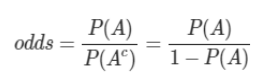

* 만약, 임의의 사건 A가 발생할 확률 P(A)가 1에 가까워질수록 오즈의 값은 무한대로 치솟고, 그 반대의 경우에는 0이 됨  
* 즉, 오즈가 커질수록 사건 A가 발생할 확률 P(A)가 증가함
* 오즈는 음이 아닌 실수이고, 성공 가능성이 실패 가능성보다 클 경우 1보다 큰 값을 가짐

# 3. 오즈비 (Odds Ratio)

### 오즈비 (Odds  Ratio)
* 오즈비는 오즈들의 비이며 수식상 정의는 아래와 같음
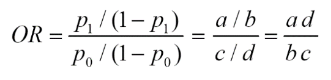

### 오즈비 값에 따른 해석 방법
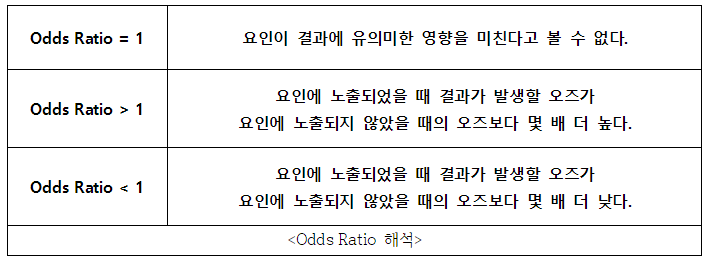


* 흡연자 중 심근경색이 발생할 Odds는 170/173=0.98이고, 비흡연자 중 심근경색이 발생할 Odds는 90/347=0.26임  
* 따라서 오즈비는 0.98/0.26=3.77이고, 흡연자의 심근경색 발생 가능성이 비흡연자의 심근경색 발생 가능성보다 3.77배 더 높음을 의미함

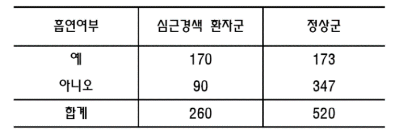

# 4. 실습

### 필요한 모듈 Import

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
!pip install dmba
from dmba import classificationSummary
import warnings
warnings.filterwarnings("ignore")

### 데이터 탐색

In [2]:
# https://www.kaggle.com/radmirzosimov/telecom-users-dataset
telecom = pd.read_csv('Telecom.csv')

In [3]:
#5986행의 데이터셋, 변수는 총 22개
telecom

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [4]:
#변수 형식 확인
telecom.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
telecom.describe(include='all')

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986,5986,5986.000000,5986,5986,5986.000000,5986,5986,5986,...,5986,5986,5986,5986,5986,5986,5986,5986.000000,5986,5986
unique,NaN,5986,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,5611,2
top,NaN,0701-RFGFI,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,NaN,1,3050,NaN,3082,4195,NaN,5396,2848,2627,...,2640,2960,2389,2356,3269,3528,2006,NaN,10,4399
mean,3533.561310,NaN,NaN,0.161377,NaN,NaN,32.468760,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.802213,NaN,NaN
std,2035.705666,NaN,NaN,0.367909,NaN,NaN,24.516391,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.114702,NaN,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,1777.250000,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.650000,NaN,NaN
50%,3546.500000,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,NaN,NaN
75%,5291.750000,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,NaN,NaN


In [6]:
#분석에 불필요하다고 판단되는 ID, Model 변수 제거
telecom = telecom.drop(['Unnamed: 0', 'customerID'], axis=1)
telecom

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [7]:
#SeniorCitizen 변수는 범주형 변수로 변경하여 이후에 분석에서 더미변수로 활용
telecom['SeniorCitizen'] = telecom['SeniorCitizen'].astype('str')

In [8]:
#결측값이 존재하는 행 제거
telecom = telecom[telecom['TotalCharges'] != " "]
telecom

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [9]:
#TotalCharges 변수는 연속형 변수로 변경하여 이후에 분석에서 연속형 변수로 활용
telecom['TotalCharges'] = telecom['TotalCharges'].astype('float')

In [10]:
#선택한 변수가 연속형으로 변경되었음을 확인
telecom.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
#모든 변수에 결측치가 없음을 확인
telecom.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#로지스틱 회귀분석을 진행하기 위해 더미변수 생성
telecom = pd.get_dummies(telecom, drop_first = True)
telecom

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,72,24.10,1734.65,1,0,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
1,44,88.15,3973.20,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,38,74.95,2869.85,0,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,4,55.90,238.50,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,2,53.45,119.50,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,95.00,95.00,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
5982,23,91.10,2198.30,0,0,1,1,1,0,1,...,1,0,1,0,1,1,1,0,0,0
5983,12,21.15,306.05,1,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
5984,12,99.45,1200.15,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1


Text(0, 0.5, 'Frequency')

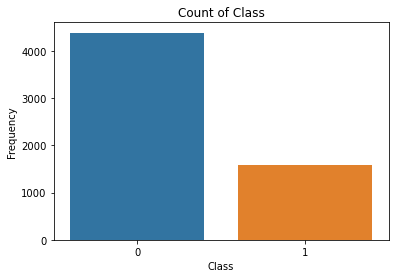

In [13]:
#범주형 타겟변수 변수 막대그래프 그리기
#0과 1의 불균형이 존재하지만 심하지는 않은 것으로 판단

ax1 = plt.subplots()
ax1 = sns.countplot(telecom['Churn_Yes'])
ax1.set_title('Count of Class')
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')

In [14]:
#타겟변수가 0이 4389, 1이 1587개로 구성되어 있음을 확인
telecom.groupby('Churn_Yes').size()

Churn_Yes
0    4389
1    1587
dtype: int64

In [15]:
#Train:Test = 7:3으로 데이터 분할
y = telecom['Churn_Yes']
x = telecom.drop('Churn_Yes', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 1668, shuffle=True, stratify=y)

In [16]:
#로지스틱 회귀분석 모델 생성
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [17]:
#Train Set에 대한 성능평가
print(model.score(X_train, Y_train))

0.8080325125508009


In [18]:
#Test Set에 대한 성능평가
print(model.score(X_test, Y_test))

0.7941996653653095


In [26]:
y_pred = model.predict(X_train)
classificationSummary(Y_train, y_pred)
print()

#민감도(Sensitivity): 실제로 1인 것 중에 1로 예측한 것의 비율
#특이도(Specificity): 실제로 0인 것 중에 0으로 예측한 것의 비율

cm = confusion_matrix(Y_train, y_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Confusion Matrix (Accuracy 0.8080)

       Prediction
Actual    0    1
     0 2780  292
     1  511  600

Sensitivity :  0.54005400540054
Specificity :  0.9049479166666666


In [25]:
y_pred = model.predict(X_test)
classificationSummary(Y_test, y_pred)
print()

#민감도(Sensitivity): 실제로 1인 것 중에 1로 예측한 것의 비율
#특이도(Specificity): 실제로 0인 것 중에 0으로 예측한 것의 비율

cm = confusion_matrix(Y_test, y_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Confusion Matrix (Accuracy 0.7942)

       Prediction
Actual    0    1
     0 1171  146
     1  223  253

Sensitivity :  0.5315126050420168
Specificity :  0.8891419893697798


In [19]:
#로지스틱 회귀분석 summary
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                      Logit                    Pseudo R-squared:         inf   
Dependent Variable:         Churn_Yes                AIC:                      inf   
Date:                       2021-06-10 21:36         BIC:                      inf   
No. Observations:           4183                     Log-Likelihood:           -inf  
Df Model:                   23                       LL-Null:                  0.0000
Df Residuals:               4159                     LLR p-value:              1.0000
Converged:                  1.0000                   Scale:                    1.0000
No. Iterations:             8.0000                                                   
-------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
tenure                                -0.0584      nan     nan    nan     nan     nan
MonthlyCharges                        -0.0294      nan     nan    nan     nan     nan
TotalCharges                           0.0003      nan     nan    nan     nan     nan
gender_Male                           -0.1085   0.0657 -1.6515 0.0986 -0.2373  0.0203
SeniorCitizen_1                        0.1716   0.1057  1.6241 0.1044 -0.0355  0.3787
Partner_Yes                            0.0637   0.0321  1.9850 0.0471  0.0008  0.1266
Dependents_Yes                        -0.1998   0.1041 -1.9186 0.0550 -0.4038  0.0043
PhoneService_Yes                       0.9068      nan     nan    nan     nan     nan
MultipleLines_No phone service         1.0281   1.8756  0.5481 0.5836 -2.6481  4.7042
MultipleLines_Yes                      0.4527   0.0763  5.9311 0.0000  0.3031  0.6023
InternetService_Fiber optic            1.5044   0.2229  6.7481 0.0000  1.0675  1.9414
InternetService_No                    -0.2241      nan     nan    nan     nan     nan
OnlineSecurity_No internet service    -0.2241      nan     nan    nan     nan     nan
OnlineSecurity_Yes                    -0.3874   0.1378 -2.8113 0.0049 -0.6575 -0.1173
OnlineBackup_No internet service      -0.2241      nan     nan    nan     nan     nan
OnlineBackup_Yes                      -0.1251   0.1127 -1.1099 0.2671 -0.3461  0.0958
DeviceProtection_No internet service  -0.2241      nan     nan    nan     nan     nan
DeviceProtection_Yes                   0.0554   0.1574  0.3521 0.7248 -0.2531  0.3640
TechSupport_No internet service       -0.2241      nan     nan    nan     nan     nan
TechSupport_Yes                       -0.2922   0.1281 -2.2813 0.0225 -0.5432 -0.0412
StreamingTV_No internet service       -0.2241      nan     nan    nan     nan     nan
StreamingTV_Yes                        0.4435   0.0951  4.6632 0.0000  0.2571  0.6299
StreamingMovies_No internet service   -0.2241      nan     nan    nan     nan     nan
StreamingMovies_Yes                    0.4873      nan     nan    nan     nan     nan
Contract_One year                     -0.6152   0.1363 -4.5148 0.0000 -0.8823 -0.3481
Contract_Two year                     -1.4524   0.2436 -5.9618 0.0000 -1.9299 -0.9749
PaperlessBilling_Yes                   0.3299   0.0921  3.5841 0.0003  0.1495  0.5103
PaymentMethod_Credit card (automatic) -0.1035   0.2148 -0.4817 0.6300 -0.5246  0.3176
PaymentMethod_Electronic check         0.2919      nan     nan    nan     nan     nan
PaymentMethod_Mailed check            -0.0159   0.0000    -inf 0.0000 -0.0159 -0.0159
=====================================================================================

"""

In [20]:
# odds ratio
np.exp(result.params)

tenure                                   0.943266
MonthlyCharges                           0.971034
TotalCharges                             1.000325
gender_Male                              0.897183
SeniorCitizen_1                          1.187207
Partner_Yes                              1.065798
Dependents_Yes                           0.818923
PhoneService_Yes                         2.476287
MultipleLines_No phone service           2.795696
MultipleLines_Yes                        1.572590
InternetService_Fiber optic              4.501477
InternetService_No                       0.799229
OnlineSecurity_No internet service       0.799232
OnlineSecurity_Yes                       0.678819
OnlineBackup_No internet service         0.799233
OnlineBackup_Yes                         0.882382
DeviceProtection_No internet service     0.799239
DeviceProtection_Yes                     1.057001
TechSupport_No internet service          0.799238
TechSupport_Yes                          0.746642


### 결론

#### 실습에 사용한 데이터는 통신사 고객 데이터로, 연속형 변수와 범주형 변수가 혼합된 형태의 데이터이다.

Train Set과 Test Set을 7:3으로 분할하여 사용하였다. 로지스틱 회귀분석 모델을 사용하기 위해서는 의사결정나무와는 달리 각 변수를 수치형으로 바꿔주어야 한다. 따라서 범주형 변수들에 대해 one-hot encoding을 통해 더미변수화를 진행해주었다. 타겟변수의 불균형이 약간 존재하기는 했지만 심각한 수준은 아니었기 때문에 샘플링은 별도로 진행하지 않았다.

Train Set에 대한 성능으로는 정확도 0.8080로 민감도는 0.5400, 특이도는 0.9049가 나왔다. Test set에 대한 성능으로는 정확도 0.7942, 민감도는 0.5315, 특이도는 0.8891이 나왔다. 모델의 Overfitting은 발생하지 않았다. Cut-off를 조절하면 민감도를 더 높일 수 있을 것으로 생각된다.

마지막으로 각 변수들에 대한 오즈비를 계산했는데 오즈비의 유효성을 확인하기 위해 오즈비의 신뢰구간을 함께 출력하여 신뢰구간이 1을 포함하는지 여부를 보아야하는데 이 부분을 코드로 구현하지 못했다. 방법을 알게 되면 수정할 계획이다.